# German Credit Data 



## Step 1: Data Preprecessing

In [1]:
# pip install scikit-learn

In [2]:
import pandas as pd

In [3]:
credit = pd.read_csv(r'D:\Mitsu\MS-ISM\Q3\508 - Data Mining I\Week5\DataSet\credit.csv')

In [4]:
credit.head(3)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,A11,6,A34,A43,1169,A65,A75,4,4,67,A143,A152,2,A173,1,A192,no
1,A12,48,A32,A43,5951,A61,A73,2,2,22,A143,A152,1,A173,1,A191,yes
2,A14,12,A34,A46,2096,A61,A74,2,3,49,A143,A152,1,A172,2,A191,no


In [5]:
credit.shape

(1000, 17)

In [6]:
X = pd.get_dummies(credit.iloc[: ,0:16] , drop_first = True)
X.shape

(1000, 39)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
labelencoder_credit = LabelEncoder()

In [9]:
y = labelencoder_credit.fit_transform(credit['default'].values)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Step 2: Build a Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [13]:
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [14]:
y_pred = tree.predict(X_test)

In [15]:
print("Accuracy on Training DataSet: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test DataSet: {:.3f}".format(accuracy_score(y_pred, y_test)))

Accuracy on Training DataSet: 1.000
Accuracy on test DataSet: 0.680


In [16]:
from sklearn import metrics
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

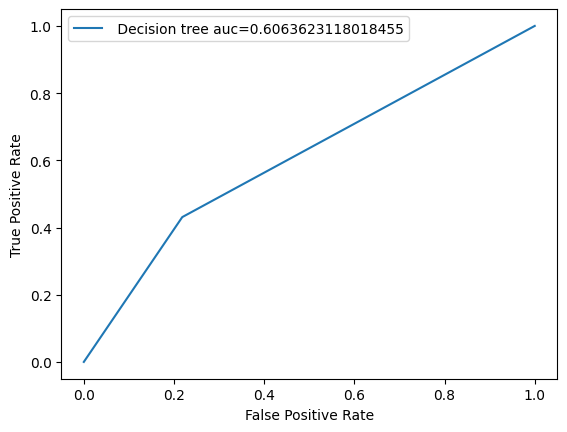

In [17]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
pyplot.plot(fpr,tpr,label=" Decision tree auc="+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
pyplot.show()

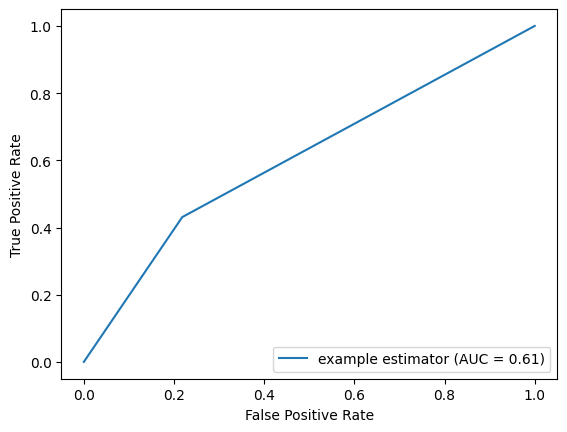

In [18]:
#svc_disp = RocCurveDisplay.from_estimator(tree, X_test, y_test)
# plt.show()


fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='example estimator')
display.plot()

# pyplot.plot(fpr,tpr,label=" Decision tree auc="+str(auc))
# pyplot.xlabel('False Positive Rate')
# pyplot.ylabel('True Positive Rate')
# show the legend
# pyplot.legend()
pyplot.show()

## Step 3: Cross Validation

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
scores = cross_val_score(tree, X, y, cv= 5)

In [21]:
print("Accuracy scores of each fold: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Accuracy scores of each fold: [0.7   0.725 0.615 0.66  0.68 ]
Average cross-validation score: 0.68


## Step 4: Emsemble Methods

### Emsemble Method 1: Bagging 

In [22]:
from sklearn.ensemble import BaggingClassifier

In [23]:
bagging = BaggingClassifier(n_estimators=100, random_state=0)
bagging.fit(X_train, y_train)

BaggingClassifier(n_estimators=100, random_state=0)

In [24]:
y_bagging_pred = bagging.predict(X_test)

In [25]:
print("Bagging Model Accuracy on test set: {:.3f}".format(accuracy_score(y_test,y_bagging_pred)))

Bagging Model Accuracy on test set: 0.770


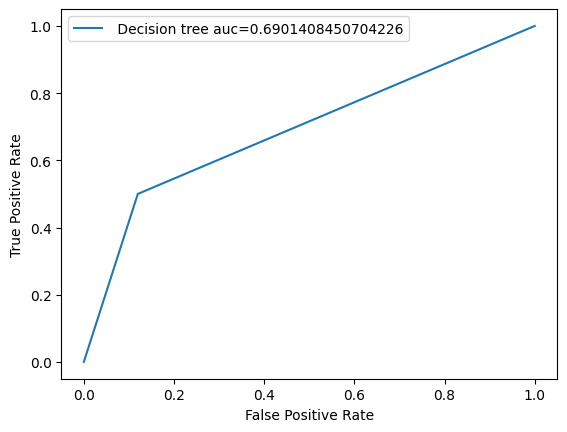

In [26]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_bagging_pred)
auc = metrics.roc_auc_score(y_test, y_bagging_pred)
pyplot.plot(fpr,tpr,label=" Decision tree auc="+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
pyplot.show()

### Emsemble Method 2: Boosting

In [27]:
from sklearn.ensemble import AdaBoostClassifier

In [28]:
boost = AdaBoostClassifier(n_estimators=100, random_state=0)
boost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [29]:
y_boost_pred = boost.predict(X_test)

In [30]:
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_boost_pred, y_test)))

Accuracy on test set: 0.770


In [31]:
from sklearn import metrics
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test, y_boost_pred)
auc = metrics.auc(fpr, tpr)
auc

0.7105390966488587

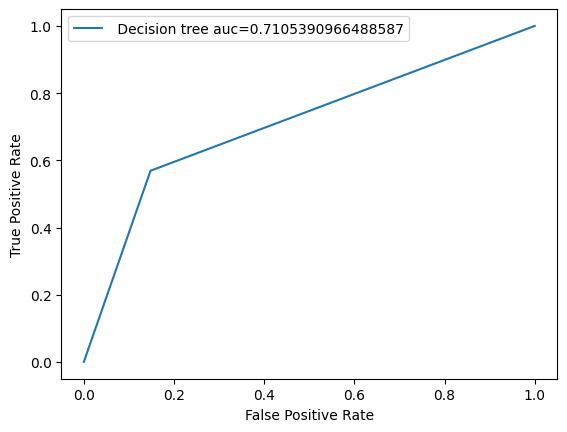

In [32]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_boost_pred)
auc = metrics.roc_auc_score(y_test, y_boost_pred)
pyplot.plot(fpr,tpr,label=" Decision tree auc="+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
pyplot.show()

# Emsemble Method 3: Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
forest = RandomForestClassifier(n_estimators=1000, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [35]:
y_rf_pred = forest.predict(X_test)

In [36]:
print("Random Forest Accuracy on test set: {:.3f}".format(accuracy_score(y_test, y_rf_pred)))

Random Forest Accuracy on test set: 0.765


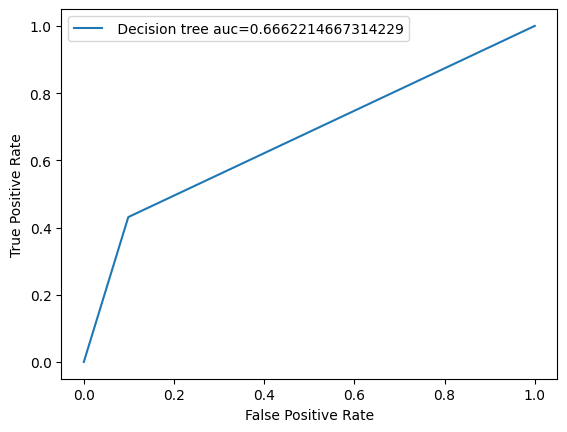

In [37]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_rf_pred)
auc = metrics.roc_auc_score(y_test, y_rf_pred)
pyplot.plot(fpr,tpr,label=" Decision tree auc="+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
pyplot.show()

In [38]:
importances = forest.feature_importances_
df = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
df = df.sort_values('importance')
print(df)

                    feature  importance
21              purpose_A48    0.001737
15             purpose_A410    0.002645
18              purpose_A44    0.003130
19              purpose_A45    0.005668
25      savings_balance_A64    0.007269
31        other_credit_A142    0.009528
24      savings_balance_A63    0.009597
34             housing_A153    0.009988
20              purpose_A46    0.011386
23      savings_balance_A62    0.011644
22              purpose_A49    0.012295
12       credit_history_A33    0.012547
8      checking_balance_A13    0.012949
29  employment_duration_A74    0.014069
37                 job_A174    0.014574
14              purpose_A41    0.015595
35                 job_A172    0.015615
6                dependents    0.016054
30  employment_duration_A75    0.016573
16              purpose_A42    0.017283
11       credit_history_A32    0.017431
28  employment_duration_A73    0.018203
10       credit_history_A31    0.018878
36                 job_A173    0.018904


# Step 5: Grid Search

In [39]:
import numpy as np

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
params = {'criterion':['gini','entropy'],'max_leaf_nodes': list(range(2, 50)), 'max_depth': np.arange(3, 15)}

In [42]:
tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=0), params, cv=10)
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...]})

In [43]:
tree_grid.best_estimator_

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=17, random_state=0)

In [44]:
y_pred_grid = tree_grid.predict(X_test)

In [45]:
print("Grid-search Model Accuracy on test set: {:.3f}".format(accuracy_score(y_test, y_pred_grid)))

Grid-search Model Accuracy on test set: 0.740


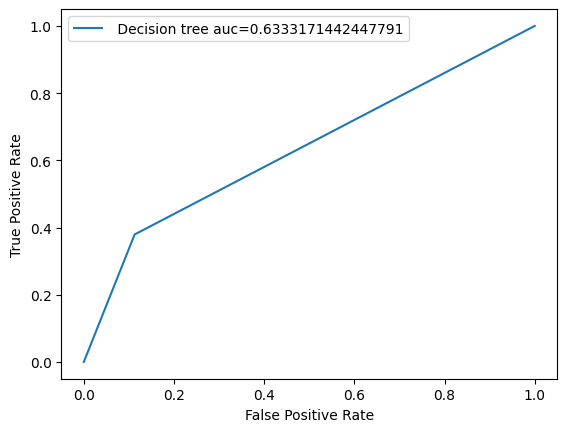

In [46]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_grid)
auc = metrics.roc_auc_score(y_test, y_pred_grid)
pyplot.plot(fpr,tpr,label=" Decision tree auc="+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
pyplot.show()